# Workshop 8
## Emilio and Saffian 

## Data

In [73]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from time import time
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
#!pip install umap-learn
import umap

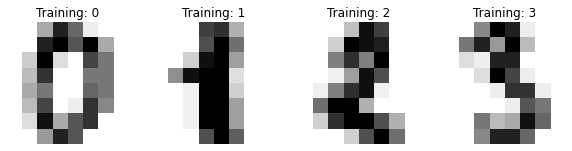

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

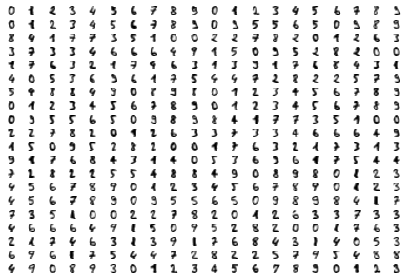

In [3]:
fig, ax_array = plt.subplots(20, 20)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

# Train-Test-Split

In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# SVM

In [7]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

In [8]:
# Learn the digits on the train subset
clf.fit(X_train, y_train)

SVC(gamma=0.001)

In [9]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

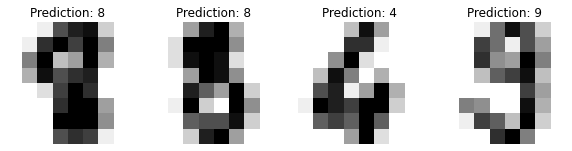

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [11]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


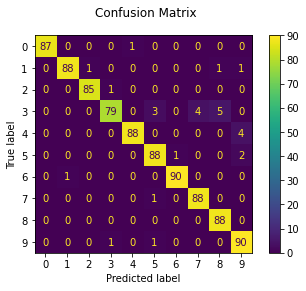

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [13]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

# SVM with dimensionality reduction (PCA)

In [86]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [87]:
# Reshape the 28x28 pixel images into a single 784px vector using .reshape
x_train = np.reshape(x_train, (len(x_train), -1))/255
x_test = np.reshape(x_test, (len(x_test), -1))/255

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [88]:
# Set number of components to extract and scale each feature to have a variance of 1
steps = [('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))]
pipeline = Pipeline(steps)
pipeline.fit(x_train)

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=0.85))])

In [89]:
#Check number of components extracted to account for 85% of the variance
pipeline['pca'].n_components_

185

In [90]:
reduced = pipeline.inverse_transform(pipeline.transform(x_train))
reduced

array([[ 4.24788121e-16,  1.20126908e-15,  3.48457367e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.89096283e-17, -2.39274044e-17, -6.90208307e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.17634172e-17, -9.33241584e-16, -4.13402775e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 6.71392139e-17,  5.85596844e-16, -3.01635764e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.00584923e-17, -6.06967005e-16, -1.61720345e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.11372116e-18,  2.03885762e-16,  2.63188603e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

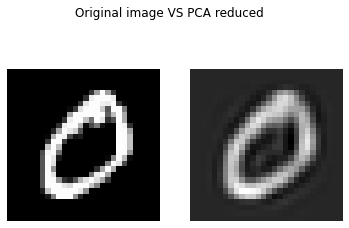

In [91]:
# let us visualize the PCA reduced number
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(x_train[1].reshape(28,28), cmap='gray')
ax2.matshow(reduced[1].reshape(28,28), cmap='gray')
ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle("Original image VS PCA reduced".format(y_train[0]))
plt.show()

In [92]:
# Train with all components takes around 20 min....in this case it crashed the kernel
# Acc. 96

steps = [('scaling', StandardScaler()), ('clf', SVC())]

pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

# time taken
t_all_feats = time() - t0
print("Training and classification done in {}s".format(t_all_feats))

accuracy: 0.9661 

[[ 968    0    1    1    0    3    3    2    2    0]
 [   0 1127    3    0    0    1    2    0    2    0]
 [   5    1  996    2    2    0    1   15    9    1]
 [   0    0    4  980    1    7    0   11    7    0]
 [   0    0   12    0  944    2    4    7    3   10]
 [   2    0    1   10    2  854    6    8    7    2]
 [   6    2    1    0    4    8  930    2    5    0]
 [   1    6   13    2    3    0    0  990    0   13]
 [   3    0    4    6    6    9    3   14  926    3]
 [   4    6    5   11   12    2    0   20    3  946]]
Training and classification done in 681.6293370723724s


##### with PCA reduction

In [93]:
# define pipeline steps
steps = [('scaling', StandardScaler()), ('reduce_dim', PCA(n_components=50)), ('clf', SVC())]
pipeline = Pipeline(steps)

# train
t0 = time()
pipeline.fit(x_train, y_train)

# predict
y_pred = pipeline.predict(x_test)

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

t_reduced_feats = time() - t0
print("Training and classification done in {}s".format(t_reduced_feats))
print("Speedup {}x".format(t_all_feats/t_reduced_feats))

accuracy: 0.9708 

[[ 970    0    1    1    0    3    3    1    1    0]
 [   0 1126    4    1    0    1    1    0    1    1]
 [   3    0 1007    3    1    1    1    9    6    1]
 [   0    0    0  986    2    4    0    8    9    1]
 [   0    1    7    1  947    0    4    5    2   15]
 [   2    0    0   12    1  863    8    0    5    1]
 [   5    3    1    1    4    6  932    1    5    0]
 [   2    9   14    1    2    0    0  984    2   14]
 [   3    0    3   10    5    5    2    5  937    4]
 [   3    5    1    8   13    2    0   14    7  956]]
Training and classification done in 108.36539602279663s
Speedup 6.290101472327747x


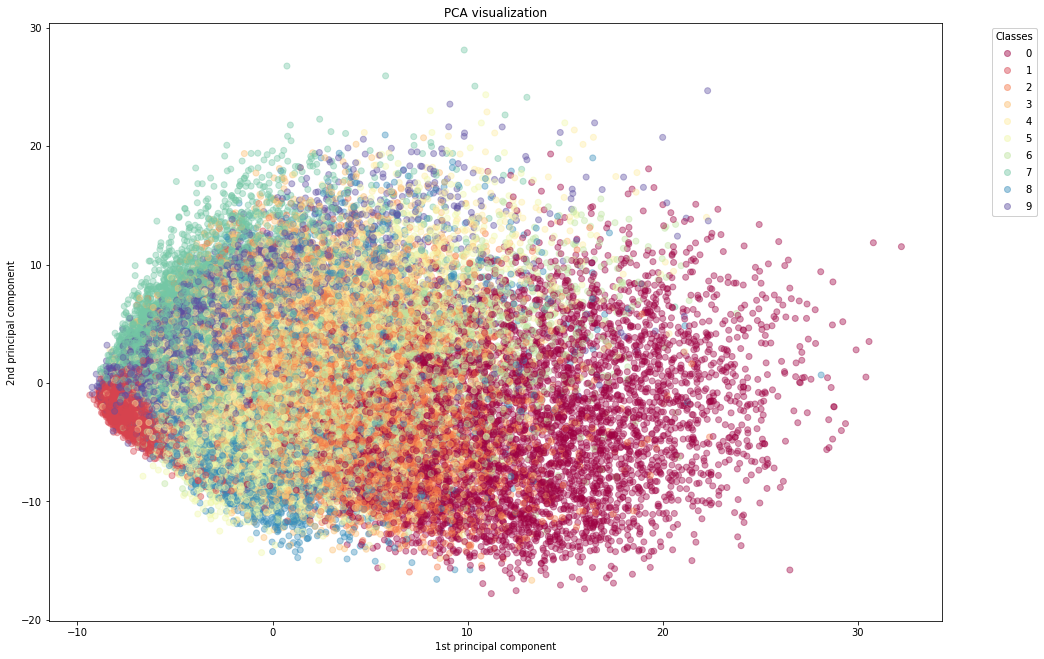

CPU times: user 8.74 s, sys: 566 ms, total: 9.31 s
Wall time: 6.34 s


In [94]:
%%time

# define pipeline steps
pca_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dim_reduction', PCA(n_components=2))
])

pca_results =  pca_pipeline.fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=pca_results[:,0], 
    y=pca_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


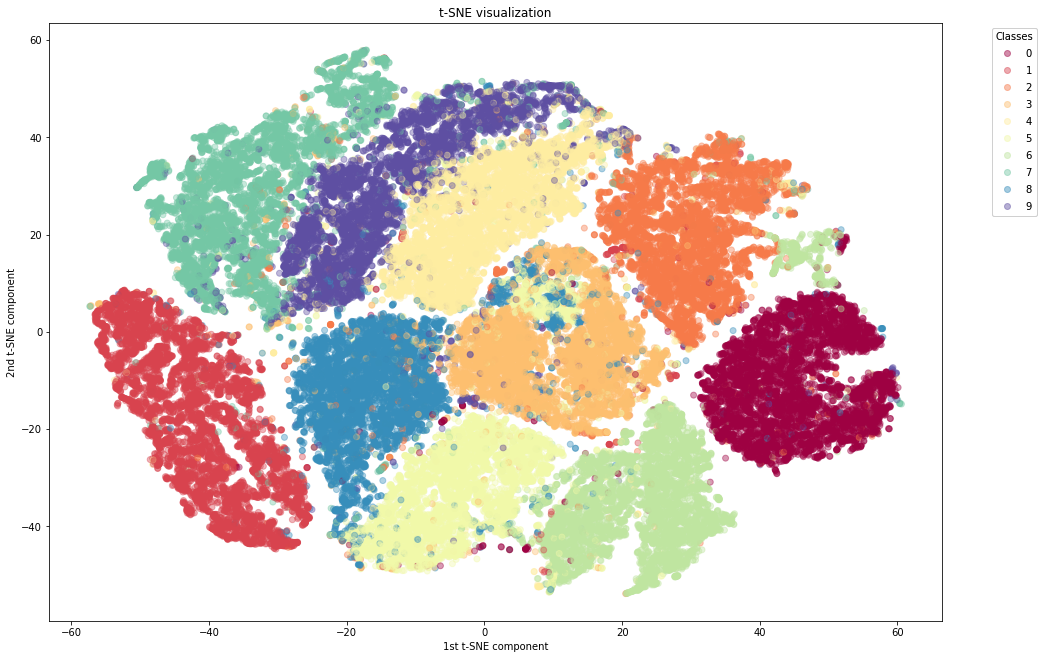

CPU times: user 33min 35s, sys: 22.6 s, total: 33min 57s
Wall time: 19min 10s


In [95]:
%%time

# define pipeline steps
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    # reduce to 50 PCA components, before t-SNE
    # otherwise, it is gonna take forever to finish…
    ('dim_reduction', PCA(n_components=50)), 
    ('2d_reduction',  TSNE(n_components=2, init='pca', random_state=42))
])

tsne_results =  tsne_pipeline.fit_transform(x_train)

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("t-SNE visualization")
plt.xlabel("1st t-SNE component")
plt.ylabel("2nd t-SNE component")
plt.show()

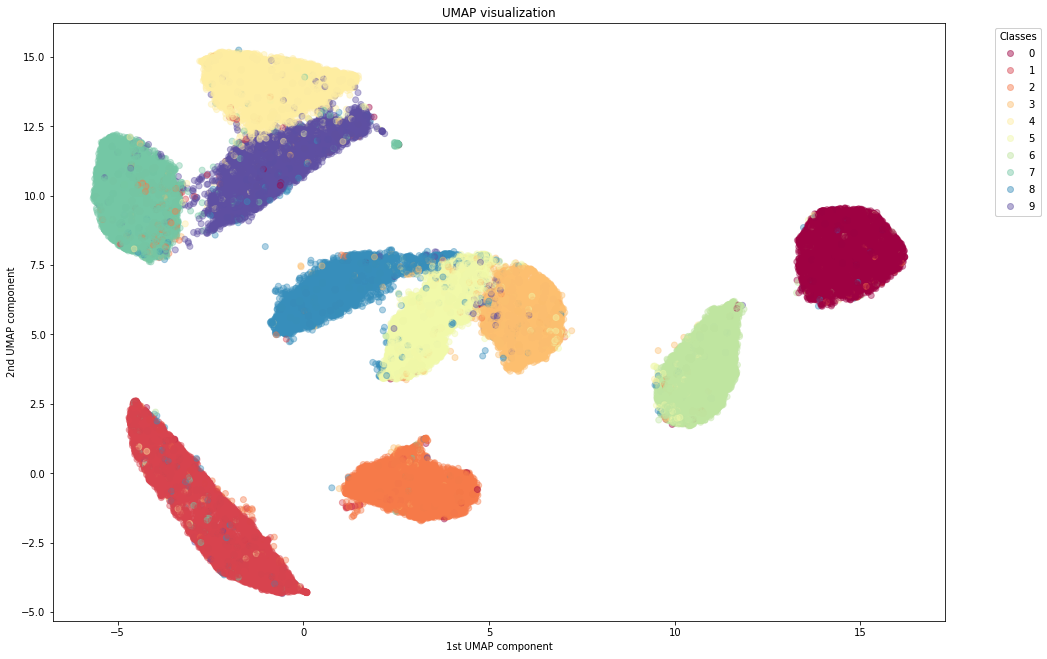

CPU times: user 2min 26s, sys: 2.76 s, total: 2min 28s
Wall time: 2min 33s


In [60]:
%%time

# run UMAP
umap_results =  umap.UMAP(n_components=2, random_state=42).fit_transform(x_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))
scatter = ax.scatter(
    x=umap_results[:,0], 
    y=umap_results[:,1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4
)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes",bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)
ax.set_title("UMAP visualization")
plt.xlabel("1st UMAP component")
plt.ylabel("2nd UMAP component")
plt.show()

# KNN

In [75]:
X_train, X_test, y_train, y_test = train_test_split( data, digits.target, test_size=0.3, shuffle=False)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
cross_validate(knn, X_train, y_train, cv=5)["test_score"].mean()

0.941930689938658

In [77]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()

# Hyperparameter Grid
opt_k = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# Instanciate Grid Search
grid = GridSearchCV(model, opt_k, n_jobs=-1,  cv = 5)

# Fit data to Grid Search
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3}
0.9474925694049201


In [78]:
scores=[]
std=[]
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean())
    std.append(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').std())

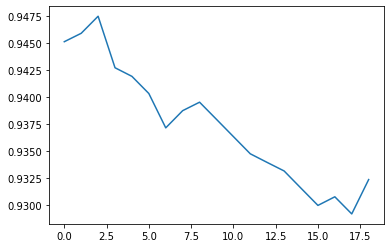

In [79]:
import matplotlib.pyplot as plt
plt.plot(scores);

Text(0, 0.5, 'Test_score')

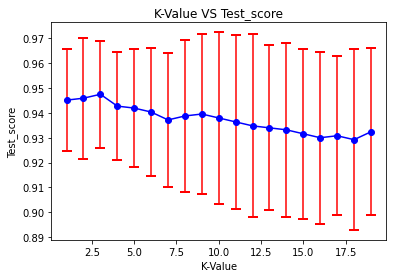

In [80]:
sample_size = range(1,20)
plt.errorbar(sample_size, scores, std, fmt='-o', color='blue', ecolor = 'red', capthick = 2, capsize = 5)

plt.title("K-Value VS Test_score")
plt.xlabel("K-Value")
plt.ylabel("Test_score")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy:  0.97
Precision:  0.97
Recall:  0.97


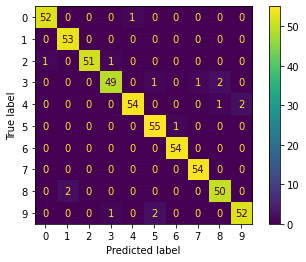

In [81]:
from sklearn.metrics import classification_report

Optimize_model = KNeighborsClassifier(n_neighbors=3)
Optimize_model.fit(X_train, y_train)
y_pred = Optimize_model.predict(X_test)

plot_confusion_matrix(Optimize_model, X_test, y_test)

print("Accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("Precision: ",round(precision_score(y_test, y_pred,average='micro'),3))
print("Recall: ",round(recall_score(y_test, y_pred,average='micro'),3))

# Random forest

In [82]:
# Train model with default 
clf = RandomForestClassifier(max_depth=2, random_state=0)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('scores Mean: ', np.mean(scores))
print('scores std: ', np.std(scores))

CV Mean:  0.7859640801871878
STD:  0.06300899162150876




In [83]:
# find optimal with grid search

rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.9292069815974198
Best Params:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}


CV Mean:  0.9260292164674635
STD:  0.028696018120502417
Accuracy:  0.917
Precision:  0.917
Recall:  0.917


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


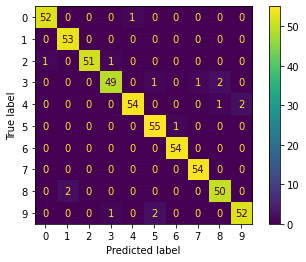

In [84]:
# Train model with default 
clf = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto', n_estimators = 500)
clf.fit(X_train, y_train)
# get cross val scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
y_pred = clf.predict(X_test)

print('CV Mean: ', np.mean(scores))
print('STD: ', np.std(scores))

plot_confusion_matrix(Optimize_model, X_test, y_test)

print("Accuracy: ",round(accuracy_score(y_test, y_pred),3))
print("Precision: ",round(precision_score(y_test, y_pred,average='micro'),3))
print("Recall: ",round(recall_score(y_test, y_pred,average='micro'),3))